In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
import warnings
import time

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "D:\software\miniconda\envs\Mymind\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: 找不到指定的模块。


In [48]:
# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号
# 如果本代码出现问题或其他优化思路，会在答疑群进行更新！并且，大家有问题在答疑群中也可以问DS C君
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 

In [49]:
df = pd.read_excel('表.xlsx',index_col=0)
df.head()

,Date,USD (PM),Value,DealDay,黄金涨幅,比特币涨幅,黄金15日均价,黄金15日乖离率,比特币5日均价,比特币5日乖离率,...,预计比特币涨幅,预计现金持有份额,预计总资产,预计总资产变化率,黄金牛市,gold_cow,比特币牛市,bt_cow,黄金购买风险,比特币购买风险
0,2016-09-11,0.00,621.65,0,0.566145,0.510080,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.494444,-1,0.516667,1,0.51965,0.527381
1,2016-09-12,1324.60,609.67,1,0.566145,0.509356,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.488889,-2,0.533333,2,0.51595,0.538481
2,2016-09-13,1323.65,610.92,1,0.561015,0.510146,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.483333,-3,0.550000,3,0.51225,0.549581
3,2016-09-14,1321.75,608.82,1,0.555886,0.509949,0.0,0.571622,0.000000,0.550392,...,0,0,0,0,0.477778,-4,0.566667,4,0.50855,0.560681
4,2016-09-15,1310.80,610.38,1,0.507019,0.510146,0.0,0.571622,0.009834,0.545356,...,0,0,0,0,0.472222,-5,0.583333,5,0.50485,0.570104


使用arima模型进行预测，参数选择来自于02中的代码

In [50]:
def gold_predict(data,date):
    model = ARIMA(data, order=(4,1,4))  # order(p,d阶差分，q)
    result = model.fit()
    try:
        pred = result.predict(date.strftime('%m-%d-20%y'),(date+datetime.timedelta(15)).strftime('20%y-%m-%d'))
    except:
        # 15天后可能不是交易日会报错，加两天
        pred = result.predict(date.strftime('%m-%d-20%y'),(date+datetime.timedelta(17)).strftime('20%y-%m-%d'))
    return pred, abs(sum(result.resid))

def bt_predict(data,date):
    model = ARIMA(data, order=(2,1,2))
    result = model.fit()
    pred = result.predict(date.strftime('%m-%d-20%y'),(date+datetime.timedelta(5)).strftime('20%y-%m-%d'))
    return pred, abs(sum(result.resid))

# 这里会运行2545.082571029663秒，时间充足可以自己运行一下
# !!!!!（下面的这个单元格可以不运行）

In [134]:
t=time.time()
df['黄金残差']=0
df['比特币残差']=0
df['预计黄金涨幅']=0
df['预计比特币涨幅']=0
bt_df = df[['Date','Value']]
gold_df = df[['Date','USD (PM)']][df['DealDay']==1]
gold_df.index=gold_df['Date']
bt_df.index=bt_df['Date']
del gold_df['Date']
del bt_df['Date']
for i in range(df.shape[0]):
    if df['DealDay'][i]:
        try:
            p,r=gold_predict(gold_df[:i],df['Date'][i])
            df['黄金残差'][i]=r
            df['预计黄金涨幅'][i]=p[0]
        except:
            pass
    try:
        p,r=bt_predict(bt_df[:i],df['Date'][i])
        df['比特币残差'][i]=r
        df['预计比特币涨幅'][i]=p[0]
    except:
        pass
time.time()-t

2545.082571029663

In [51]:
df=pd.read_excel('预计涨幅.xlsx',index_col=0)

In [52]:
# df=pd.read_excel('预计涨幅.xlsx')

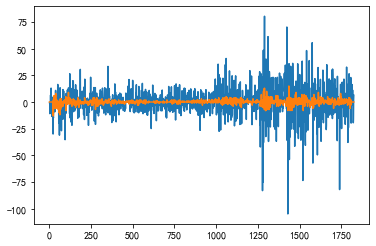

In [53]:
df['USD (PM)'][1:].diff(1).dropna().plot()
df['预计黄金涨幅'][1:].plot()
plt.savefig('预计黄金涨幅.png')
plt.show()

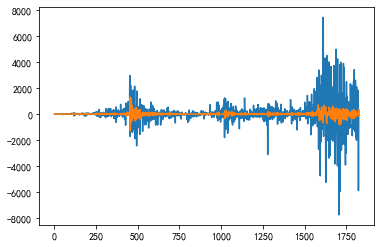

In [54]:
df['Value'].diff(1).dropna().plot()
df['预计比特币涨幅'].plot()
plt.savefig('预计比特币涨幅.png')
plt.show()

In [55]:
df.head()

,Date,USD (PM),Value,DealDay,黄金涨幅,比特币涨幅,黄金15日均价,黄金15日乖离率,比特币5日均价,比特币5日乖离率,...,预计总资产,预计总资产变化率,黄金牛市,gold_cow,比特币牛市,bt_cow,黄金购买风险,比特币购买风险,黄金残差,比特币残差
0,2016-09-11,0.00,621.65,0,0.566145,0.510080,0.0,0.571622,0.000000,0.550392,...,0,0,0.494444,-1,0.516667,1,0.51965,0.527381,0,0
1,2016-09-12,1324.60,609.67,1,0.566145,0.509356,0.0,0.571622,0.000000,0.550392,...,0,0,0.488889,-2,0.533333,2,0.51595,0.538481,0,0
2,2016-09-13,1323.65,610.92,1,0.561015,0.510146,0.0,0.571622,0.000000,0.550392,...,0,0,0.483333,-3,0.550000,3,0.51225,0.549581,0,0
3,2016-09-14,1321.75,608.82,1,0.555886,0.509949,0.0,0.571622,0.000000,0.550392,...,0,0,0.477778,-4,0.566667,4,0.50855,0.560681,0,0
4,2016-09-15,1310.80,610.38,1,0.507019,0.510146,0.0,0.571622,0.009834,0.545356,...,0,0,0.472222,-5,0.583333,5,0.50485,0.570104,0,0


处理残差中的空值（主要来自非交易日），使用上一次交易日的残差进行补充  
对残差，预计涨幅进行归一化

In [56]:
def zeros(x):
    if x==0:
        return np.nan
    else:
        return x

In [57]:
df['黄金残差']=df['黄金残差'].apply(zeros).fillna(method='ffill')
df['预计黄金涨幅']=df['预计黄金涨幅'].apply(zeros).fillna(method='ffill')
# df=df.fillna()
max_,min_=df['黄金残差'].max(),df['黄金残差'].min()
df['黄金残差']=df['黄金残差'].apply(lambda x:(x-min_)/(max_-min_))
max_,min_=df['比特币残差'].max(),df['比特币残差'].min()
df['比特币残差']=df['比特币残差'].apply(lambda x:(x-min_)/(max_-min_))
max_,min_=df['预计黄金涨幅'].max(),df['预计黄金涨幅'].min()
df['预计黄金涨幅归一化']=df['预计黄金涨幅'].apply(lambda x:(x-min_)/(max_-min_))
max_,min_=df['预计比特币涨幅'].max(),df['预计比特币涨幅'].min()
df['预计比特币涨幅归一化']=df['预计比特币涨幅'].apply(lambda x:(x-min_)/(max_-min_))


计算买入评分  
买入评分=涨幅X10+牛市X5-残差+1/购买风险

In [58]:
df['黄金买入评分']=-df['黄金残差']+df['预计黄金涨幅归一化']*10+df['黄金牛市']*5+1/df['黄金购买风险']
df['比特币买入评分']=-df['比特币残差']+df['预计比特币涨幅归一化']*10+df['比特币牛市']*5+1/df['比特币购买风险']

对比评分合理性

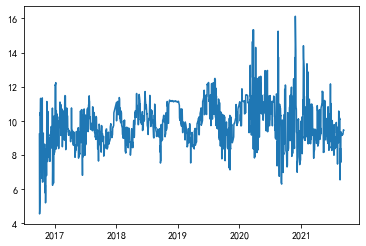

In [59]:
# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号
# 如果本代码出现问题或其他优化思路，会在答疑群进行更新！并且，大家有问题在答疑群中也可以问DS C君
plt.plot(df['Date'],df['黄金买入评分'])
plt.savefig('黄金买入评分.png')
plt.show()

上下两个图对比着看，同一时间段，下图下降，上图在上升即为合理。  
低谷时买入，峰值时卖出

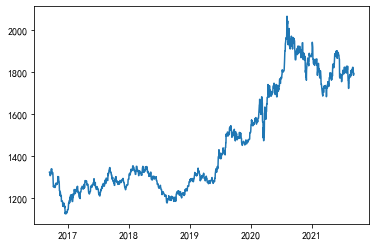

In [60]:
plt.plot(df['Date'][1:],df['USD (PM)'][1:])
plt.show()

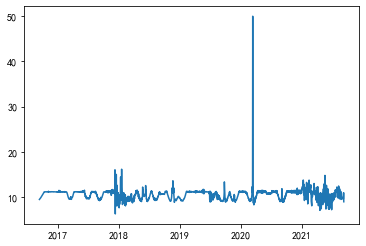

In [61]:
plt.plot(df['Date'],df['比特币买入评分'])
plt.savefig('比特币买入评分.png')
plt.show()

某一个值太大，归一化时影响其他的结果，所以去除最大值，归一化后重新将该值设为1

In [62]:
for i in range(df['比特币买入评分'].shape[0]):
    if df['比特币买入评分'][i]>30:
        print(i)

1279


In [63]:
df['比特币买入评分'][1279]=10

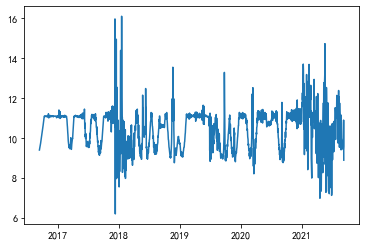

In [64]:
plt.plot(df['Date'],df['比特币买入评分'])
# plt.savefig('比特币买入评分.png')
plt.show()

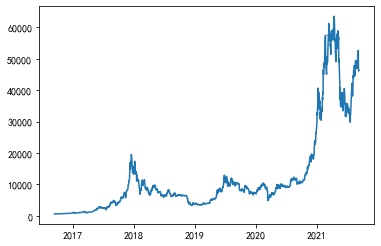

In [65]:
plt.plot(df['Date'],df['Value'])

买入评分归一化

In [66]:
max_,min_=df['黄金买入评分'].max(),df['黄金买入评分'].min()
df['黄金买入评分']=df['黄金买入评分'].apply(lambda x:(x-min_)/(max_-min_))
max_,min_=df['比特币买入评分'].max(),df['黄金买入评分'].min()
df['比特币买入评分']=df['比特币买入评分'].apply(lambda x:(x-min_)/(max_-min_))

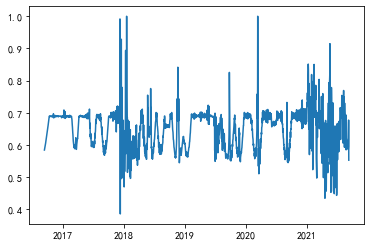

In [67]:
df['比特币买入评分'][1279]=1
plt.plot(df['Date'],df['比特币买入评分'])
plt.savefig('比特币买入评分图.png')
plt.show()

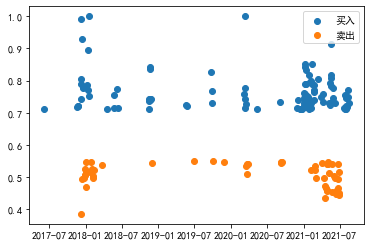

In [68]:
plt.scatter(df['Date'][df['比特币买入评分']>0.71],df['比特币买入评分'][df['比特币买入评分']>0.71],label='买入')
plt.scatter(df['Date'][df['比特币买入评分']<0.55],df['比特币买入评分'][df['比特币买入评分']<0.55],label='卖出')
plt.legend()
plt.savefig('比特币评分对比图.png')

plt.show()

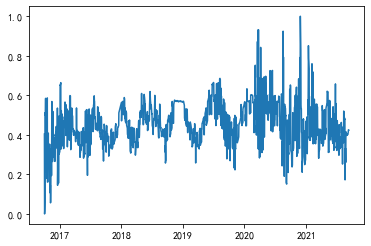

In [69]:
plt.plot(df['Date'],df['黄金买入评分'])

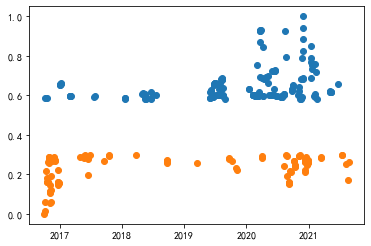

In [70]:
plt.scatter(df['Date'][df['黄金买入评分']>0.58],df['黄金买入评分'][df['黄金买入评分']>0.58])
plt.scatter(df['Date'][df['黄金买入评分']<0.3],df['黄金买入评分'][df['黄金买入评分']<0.3])
plt.savefig('黄金评分对比图.png')
plt.show()

前面计算时涨幅被归一化了，重新计算

In [71]:
# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号
# 如果本代码出现问题或其他优化思路，会在答疑群进行更新！并且，大家有问题在答疑群中也可以问DS C君
for i in df.index[1:]:
    df['黄金涨幅'][i]=df['USD (PM)'][i]-df['USD (PM)'][i-1]
    df['比特币涨幅'][i]=df['Value'][i]-df['Value'][i-1]

初始化值，将数据类型设置为浮点型，整型会直接对结果取整，导致小数位的丢失

In [72]:
df['总资产'][0]=1000.0
df['现金持有份额'][0]=1000.0
df['黄金持有份额'][0]=0.0
for i in df.columns[1:]:
    df[i]=df[i].astype('float')

开始买入与卖出：
1. 黄金评分大于0.58买入，小于0.3时卖出，比特币评分大于0.71时买入，小于0.56时卖出，即黄金买入标准0.58，卖出标准0.3
2. 买卖规则  
    判断是否为黄金交易日，是考虑黄金，不是不考虑黄金  
    当比特币和黄金可同时买入时，若黄金买入评分-0.58>(比特币买入评分-0.71)X2   (黄金评分买入标准比比特币低，上升空间更大)  
    买入额度=当前现金额度X买入评分X（1-手续费）/当前价格  
    卖出额度=持有份额*（1-评分+卖出标准）    
 
计算现金时应注意手续费

In [73]:
# 黄金买0.58，卖0.3,中间不动
# 比特币买0.72，卖56
per_gold = 0.01
per_bt = 0.02
gold_buy=0.578
gold_sell=0.311
bit_buy=0.705
bit_sell=0.562

for i in range(1,df.shape[0]):
    bt = df['比特币买入评分'][i]
    df['当前黄金利润'][i]=df['当前黄金利润'][i-1]+df['黄金涨幅'][i-1]*df['黄金持有份额'][i-1]
    df['当前比特币利润'][i]=df['当前比特币利润'][i-1]+df['比特币涨幅'][i-1]*df['比特币持有份额'][i-1]
    df['黄金持有份额'][i]=df['黄金持有份额'][i-1]
    df['现金持有份额'][i]=df['现金持有份额'][i-1]
    df['比特币持有份额'][i]=df['比特币持有份额'][i-1]
    if df['DealDay'][i]:  # 判断交易日
        gold = df['黄金买入评分'][i]
        if gold > gold_buy:
            if bt > 0.71:# 两者都可买入时
                if gold-gold_buy>(bt-bit_sell)*2:  # 买入黄金
                    df['黄金持有份额'][i]=df['黄金持有份额'][i-1]+df['现金持有份额'][i-1]*gold*(1-per_gold)/df['USD (PM)'][i-1]
                    df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*gold
#                     print('两者选黄金',df['黄金持有份额'][i],df['现金持有份额'][i],df['现金持有份额'][i-1],gold,1-per_gold,df['USD (PM)'][i-1])
                else:  # 买入比特币
                    df['比特币持有份额'][i]=df['比特币持有份额'][i-1]+df['现金持有份额'][i-1]*bt*(1-per_bt)/df['Value'][i-1]
                    df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*bt
#                     print('两者选比特币',df['比特币持有份额'][i],df['现金持有份额'][i])
            else: # 只能买黄金时
                df['黄金持有份额'][i]=df['黄金持有份额'][i-1]+df['现金持有份额'][i-1]*gold*(1-per_gold)/df['USD (PM)'][i-1]
                df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*gold
#                 print('只能买黄金',df['黄金持有份额'][i])
        if gold<gold_sell:  # sell黄金
            df['黄金持有份额'][i]=df['黄金持有份额'][i-1]-df['黄金持有份额'][i-1]*(1+gold-gold_sell)
            df['现金持有份额'][i]=df['现金持有份额'][i-1]+df['黄金持有份额'][i-1]*(1+gold-gold_sell)*(1-per_gold)*df['USD (PM)'][i-1]
#             print('卖黄金',df['黄金持有份额'][i],df['现金持有份额'][i])
        continue    
    if bt > bit_buy:  # 买入比特币
        df['比特币持有份额'][i]=df['比特币持有份额'][i-1]+df['现金持有份额'][i-1]*bt*2*(1-per_bt)/df['Value'][i-1]
        df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*bt
#         print('买比特币',df['比特币持有份额'][i],df['现金持有份额'][i])
    if bt < bit_sell:  # 卖出比特币
        df['比特币持有份额'][i]=df['比特币持有份额'][i-1]-df['比特币持有份额'][i-1]*(1+gold-bit_sell)
        df['现金持有份额'][i]=df['现金持有份额'][i-1]+df['比特币持有份额'][i-1]*(1+gold-bit_sell)*(1-per_gold)*df['Value'][i-1]
#         print('卖比特币',df['比特币持有份额'][i],df['现金持有份额'][i])

计算总资产

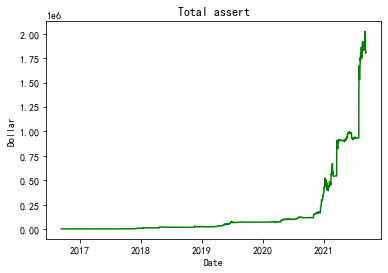

In [105]:
df['总资产']=df['黄金持有份额']*df['USD (PM)']+df['比特币持有份额']*df['Value']+df['现金持有份额']


plt.figure()
plt.plot(df['Date'],df['总资产'],color="green")
plt.xlabel("Date")
plt.ylabel("Dollar")
plt.title('Total assert') 
plt.savefig('111.png')
plt.show()

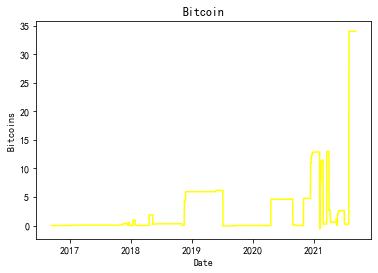

In [107]:
plt.plot(df['Date'],df['比特币持有份额'],color="yellow")
plt.xlabel("Date")
plt.ylabel("Bitcoins")
plt.title('Bitcoin') 
plt.savefig('222.png',)
plt.show()

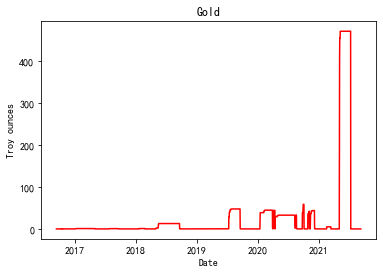

In [110]:
plt.plot(df['Date'],df['黄金持有份额'],color="red")
plt.xlabel("Date")
plt.ylabel("Troy ounces")
plt.title('Gold') 
plt.savefig('333.png')
plt.show()

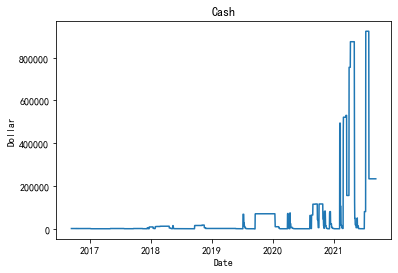

In [111]:
# DS数模团队原创思路，如果您买的是盗版，请务必在公众号：DS数模，输入：美赛。获取C题答疑群群号
# 如果本代码出现问题或其他优化思路，会在答疑群进行更新！并且，大家有问题在答疑群中也可以问DS C君
plt.plot(df['Date'],df['现金持有份额'],)
plt.xlabel("Date")
plt.ylabel("Dollar")
plt.title('Cash') 
plt.savefig('444.png')
plt.show()

In [91]:
df.to_excel('所有数据.xlsx')

佣金变化对结果的影响  
黄金佣金:0.01-0.11  
比特币佣金：0.01-0.21

In [40]:
assets=[]

for per_gold in np.arange(0.01,0.11,0.01):
    for per_bt in np.arange(0.01,0.21,0.01):
        df['总资产'][0]=1000.0
        df['现金持有份额'][0]=1000.0
        df['黄金持有份额'][0]=0.0
        for i in range(1,df.shape[0]):
            bt = df['比特币买入评分'][i]
            df['当前黄金利润'][i]=df['当前黄金利润'][i-1]+df['黄金涨幅'][i-1]*df['黄金持有份额'][i-1]
            df['当前比特币利润'][i]=df['当前比特币利润'][i-1]+df['比特币涨幅'][i-1]*df['比特币持有份额'][i-1]
            df['黄金持有份额'][i]=df['黄金持有份额'][i-1]
            df['现金持有份额'][i]=df['现金持有份额'][i-1]
            df['比特币持有份额'][i]=df['比特币持有份额'][i-1]
            if df['DealDay'][i]:  # 判断交易日
                gold = df['黄金买入评分'][i]
                if gold > 0.58:
                    if bt > 0.71:# 两者都可买入时
                        if gold-0.58>(bt-0.71)*2:  # 买入黄金
                            df['黄金持有份额'][i]=df['黄金持有份额'][i-1]+df['现金持有份额'][i-1]*gold*(1-per_gold)/df['USD (PM)'][i]
                            df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*gold
        #                     print('两者选黄金',df['黄金持有份额'][i],df['现金持有份额'][i],df['现金持有份额'][i-1],gold,1-per_gold,df['USD (PM)'][i-1])
                        else:  # 买入比特币
                            df['比特币持有份额'][i]=df['比特币持有份额'][i-1]+df['现金持有份额'][i-1]*bt*(1-per_bt)/df['Value'][i]
                            df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*bt
        #                     print('两者选比特币',df['比特币持有份额'][i],df['现金持有份额'][i])
                    else: # 只能买黄金时
                        df['黄金持有份额'][i]=df['黄金持有份额'][i-1]+df['现金持有份额'][i-1]*gold*(1-per_gold)/df['USD (PM)'][i]
                        df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*gold
        #                 print('只能买黄金',df['黄金持有份额'][i])
                if gold<0.3:  # 卖出黄金
                    df['黄金持有份额'][i]=df['黄金持有份额'][i-1]-df['黄金持有份额'][i-1]*(1+gold-0.3)
                    df['现金持有份额'][i]=df['现金持有份额'][i-1]+df['黄金持有份额'][i-1]*(1+gold-0.3)*(1-per_gold)*df['USD (PM)'][i]
        #             print('卖黄金',df['黄金持有份额'][i],df['现金持有份额'][i])
                continue    
            if bt > 0.71:  # 买入比特币
                df['比特币持有份额'][i]=df['比特币持有份额'][i-1]+df['现金持有份额'][i-1]*bt*(1-per_bt)/df['Value'][i]
                df['现金持有份额'][i]=df['现金持有份额'][i-1]-df['现金持有份额'][i-1]*bt
        #         print('买比特币',df['比特币持有份额'][i],df['现金持有份额'][i])
            if bt < 0.56:  # 卖出比特币
                df['比特币持有份额'][i]=df['比特币持有份额'][i-1]-df['比特币持有份额'][i-1]*(1+bt-0.56)
                df['现金持有份额'][i]=df['现金持有份额'][i-1]+df['比特币持有份额'][i-1]*(1+bt-0.56)*(1-per_bt)*df['Value'][i]
                df['总资产']=df['黄金持有份额']*df['USD (PM)']+df['比特币持有份额']*df['Value']+df['现金持有份额']
        assets.append(df['总资产'].max())
assets

[2025906.3454825087,
 4513.831133333837,
 4014.085866602114,
 3610.654963406043,
 3262.336471679598,
 2945.081855652928,
 2656.3527443175335,
 2410.768998711141,
 2215.4451561617493,
 2034.4811491422465,
 1866.9317417487157,
 1828.7713794225647,
 1808.9236146264425,
 1789.0758498303203,
 1769.228085034198,
 1749.380320238076,
 1729.5325554419542,
 1709.684790645832,
 1689.8370258497102,
 1669.9892610535876,
 3947.950449004322,
 3585.773471508527,
 3236.171431990668,
 2926.3080383300967,
 2643.8689203949366,
 2386.6305527580284,
 2152.5327116062704,
 1953.7276041491323,
 1795.3341717433457,
 1758.5379910112795,
 1739.857944696143,
 1721.1778983810061,
 1702.4978520658694,
 1683.817805750733,
 1665.137759435596,
 1646.4577131204594,
 1627.7776668053227,
 1609.0976204901863,
 1590.4175741750498,
 1571.7375278599134,
 3194.84351880769,
 2893.5872798555333,
 2618.580987129525,
 2367.7299713652205,
 2139.0909081058553,
 1930.862060599879,
 1741.374073135366,
 1689.6304234957165,
 1672.055720

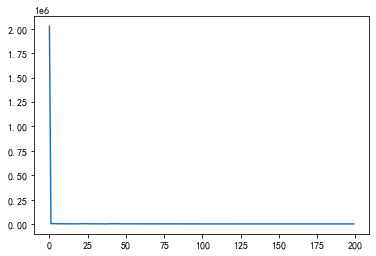

In [43]:
plt.plot(assets)
plt.savefig('不同手续费最大总资产走势图.png')
plt.show()

In [484]:
gold_ = []
bt_ = []
for per_gold in np.arange(0.01,0.11,0.01):
    for per_bt in np.arange(0.01,0.21,0.01):
        gold_.append(per_gold)
        bt_.append(per_bt)

In [486]:
df_a = pd.DataFrame()
df_a['黄金佣金']=gold_
df_a['比特币佣金']=bt_
df_a['总资产']=assets
df_a.head()

,黄金佣金,比特币佣金,总资产
0,0.01,0.01,270048.051325
1,0.01,0.02,252424.698239
2,0.01,0.03,235802.096407
3,0.01,0.04,220131.941916
4,0.01,0.05,205367.852276


In [487]:
df_a.to_excel('佣金-总资产表.xlsx')